In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
#steps
#preprocess +EDA + Feature Selection
#Extract i/p and o/p columns
#scale the values
#Train test split - cross validation
#Train the model
#Evaluate the model/model selection -
#Deploy the model

In [ ]:
#preprocess
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
#EDA
import matplotlib.pyplot as plt


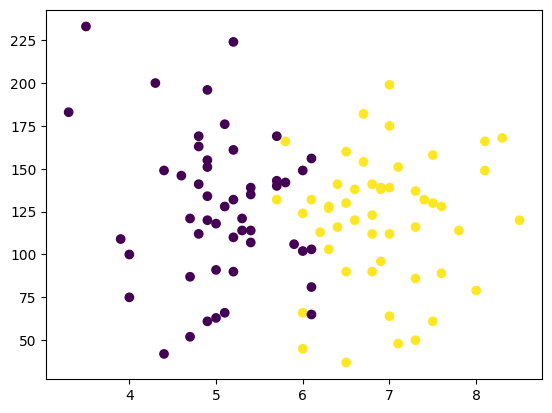

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

Preprocessing, EDA, Feature Selection has been completed. Now we will go in to step 2 where we will separate i/p and o/p columns. In this step we will consider i/p columns as independent columns and output columns as dependent columns

Now what we will do is we will take a new variable and assign all the independent variables to the new variable

In [ ]:
#Separating i/p and o/p colums
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y.shape

(100,)

In [ ]:
X.shape

(100, 2)

Y is 1D Tensor, X is 2D Tensor

In [ ]:
#Dividing into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [ ]:
X_train

,cgpa,iq
92,5.2,110.0
46,5.3,114.0
76,4.9,155.0
25,5.0,91.0
48,6.6,138.0
...,...,...
49,5.4,135.0
2,5.3,121.0
72,7.3,116.0
8,6.1,156.0


In [ ]:
X_test

,cgpa,iq
45,6.0,66.0
38,6.5,160.0
83,7.5,130.0
0,6.8,123.0
59,4.8,112.0
51,4.8,141.0
11,6.9,138.0
67,5.0,118.0
75,4.8,169.0
89,4.9,151.0


In [ ]:
Y_train

,placement
92,0
46,0
76,0
25,0
48,1
...,...
49,0
2,0
72,1
8,0


In [ ]:
Y_test

,placement
45,1
38,1
83,1
0,1
59,0
51,0
11,1
67,0
75,0
89,0


In [ ]:
#scale the values
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train =  scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.7063646 , -0.31327708],
       [-0.61939769, -0.21520773],
       [-0.96726534,  0.79000307],
       [-0.88029843, -0.77910647],
       [ 0.51117219,  0.37320834],
       [ 1.11994059, -1.78431727],
       [ 0.25027145, -0.48489843],
       [ 1.8156759 ,  1.05969377],
       [-1.05423226,  0.98614176],
       [-0.7063646 ,  2.48169929],
       [ 1.11994059, -0.90169315],
       [-0.79333152,  1.30486713],
       [ 1.98960973,  1.10872844],
       [-0.79333152, -1.39203988],
       [-1.48906683,  1.89328321],
       [ 0.07633762, -1.41655722],
       [ 0.68510602, -0.2642424 ],
       [ 2.16354356, -0.06810371],
       [ 1.29387442, -1.51462657],
       [ 0.33723837,  0.44676035],
       [-1.74996757, -1.17138386],
       [ 1.72870899, -1.07331451],
       [-0.7063646 ,  0.22610433],
       [-0.96726534,  0.275139  ],
       [ 0.16330454, -0.23972507],
       [-2.18480214,  2.70235531],
       [ 0.25027145,  0.12803498],
       [-0.27153003,  0.22610433],
       [-0.7063646 ,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
#we will apply fit_transorm on training data and transform on testing data

In [ ]:
X_test

array([[-0.01062929, -1.39203988],
       [ 0.42420528,  0.91258975],
       [ 1.29387442,  0.17706965],
       [ 0.68510602,  0.0054483 ],
       [-1.05423226, -0.2642424 ],
       [-1.05423226,  0.44676035],
       [ 0.77207294,  0.37320834],
       [-0.88029843, -0.11713839],
       [-1.05423226,  1.13324578],
       [-0.96726534,  0.69193372]])

After Scaling the values started training the model using fit in logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, Y_train)

LogisticRegression()

Predicting on Test data

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_test

,placement
45,1
38,1
83,1
0,1
59,0
51,0
11,1
67,0
75,0
89,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)


0.9

To visualize the decisive function we use the following code


In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

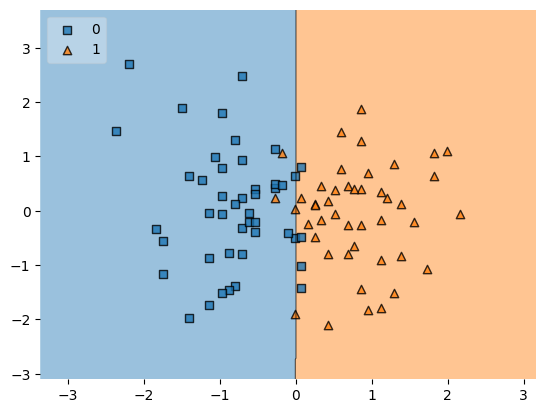

In [ ]:
plot_decision_regions(X_train,Y_train.values,clf = clf,legend = 2)

To convert the ML model into a doc and to deploy we use the pickle function

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))